#  Feature Engineering
-  Handling Missing Value
-  Handling Outlier
-  Scaling
-  Grouping and Encoding

# 1. Handling Missing Value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
Data = pd.read_csv("CC GENERAL.csv")
Data1 = Data.copy()

In [18]:
Data1.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Text(-177.22444444444443, 0.5, 'Variabel')

<Figure size 1800x1152 with 0 Axes>

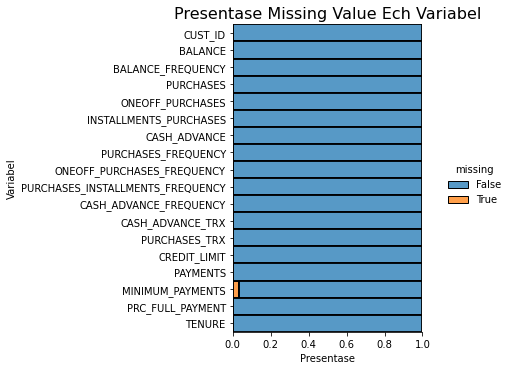

In [19]:
plt.figure(figsize=(25,16))
sns.displot(
    data=Data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

plt.title("Presentase Missing Value Ech Variabel", size = 16)
plt.xlabel("Presentase")
plt.ylabel("Variabel")


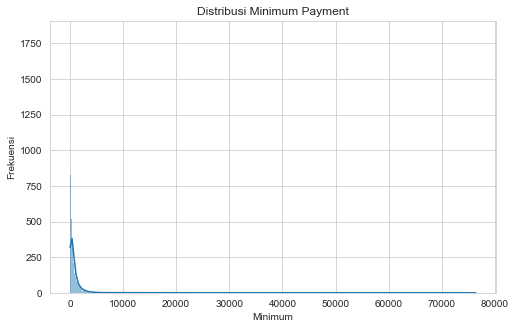

In [70]:
plt.figure(figsize = (8,5))

plt.title('Distribusi Minimum Payment')

sns.histplot(x = Data.MINIMUM_PAYMENTS, data = Data, multiple = 'stack', kde = True)

plt.xlabel('Minimum')
plt.ylabel('Frekuensi')

plt.tight_layout;

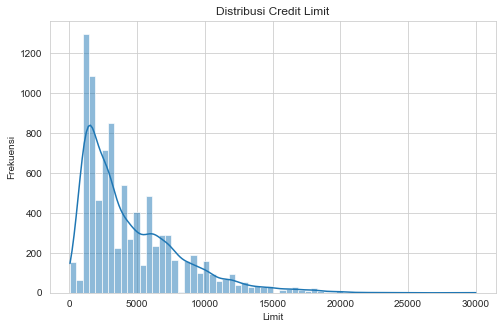

In [71]:
plt.figure(figsize = (8,5))

plt.title('Distribusi Credit Limit')

sns.histplot(x = Data.CREDIT_LIMIT, data = Data, multiple = 'stack', kde = True)

plt.xlabel('Limit')
plt.ylabel('Frekuensi')

plt.tight_layout;

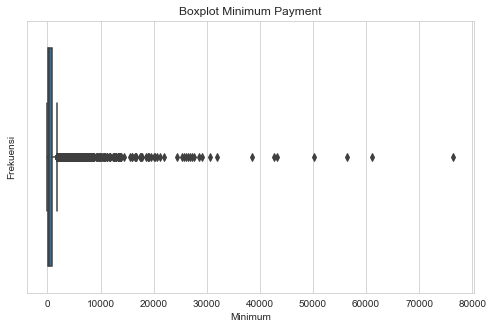

In [72]:
plt.figure(figsize = (8,5))

plt.title('Boxplot Minimum Payment')

sns.boxplot(x = Data.MINIMUM_PAYMENTS, data = Data)

plt.xlabel('Minimum')
plt.ylabel('Frekuensi')

plt.tight_layout;

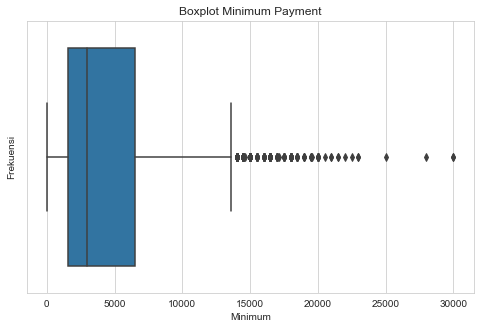

In [73]:
plt.figure(figsize = (8,5))

plt.title('Boxplot Minimum Payment')

sns.boxplot(x = Data.CREDIT_LIMIT, data = Data)

plt.xlabel('Minimum')
plt.ylabel('Frekuensi')

plt.tight_layout;

**Repalace Data Based Distribution of Data**

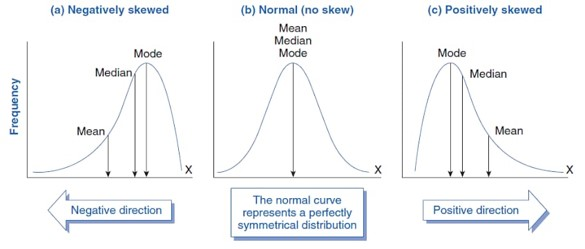

In [86]:
Data1['MINIMUM_PAYMENTS'] =Data1['MINIMUM_PAYMENTS'].fillna(Data1['MINIMUM_PAYMENTS'].median())
Data1['CREDIT_LIMIT'] =Data1['CREDIT_LIMIT'].fillna(Data1['CREDIT_LIMIT'].median())

In [89]:
Data1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Cut Missing Value**

In [91]:
Data2 = Data.dropna()

In [92]:
Data2.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Using Knn Imputer**

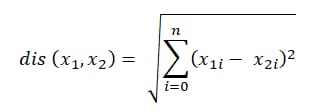

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [129]:
Data = pd.read_csv("CC GENERAL.csv")

In [130]:
Data = Data.drop(columns = ["CUST_ID"])
Data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [132]:
Kolom = Data.columns

In [133]:
scal = MinMaxScaler()
dat_scal = pd.DataFrame (scal.fit_transform(Data),columns =Kolom )
dat_scal

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,NaN,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,NaN,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [134]:
imputer = KNNImputer(n_neighbors=5)
Data = pd.DataFrame(imputer.fit_transform(Data),columns = Kolom)

In [136]:
Data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 2. Handling Outlier

In [2]:
Data = pd.read_csv("epl-goalScorer(20-21).csv",index_col = 0)
Data = Data.drop(columns = ["id"])
Data.describe()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


**1. IQR Method Detection**

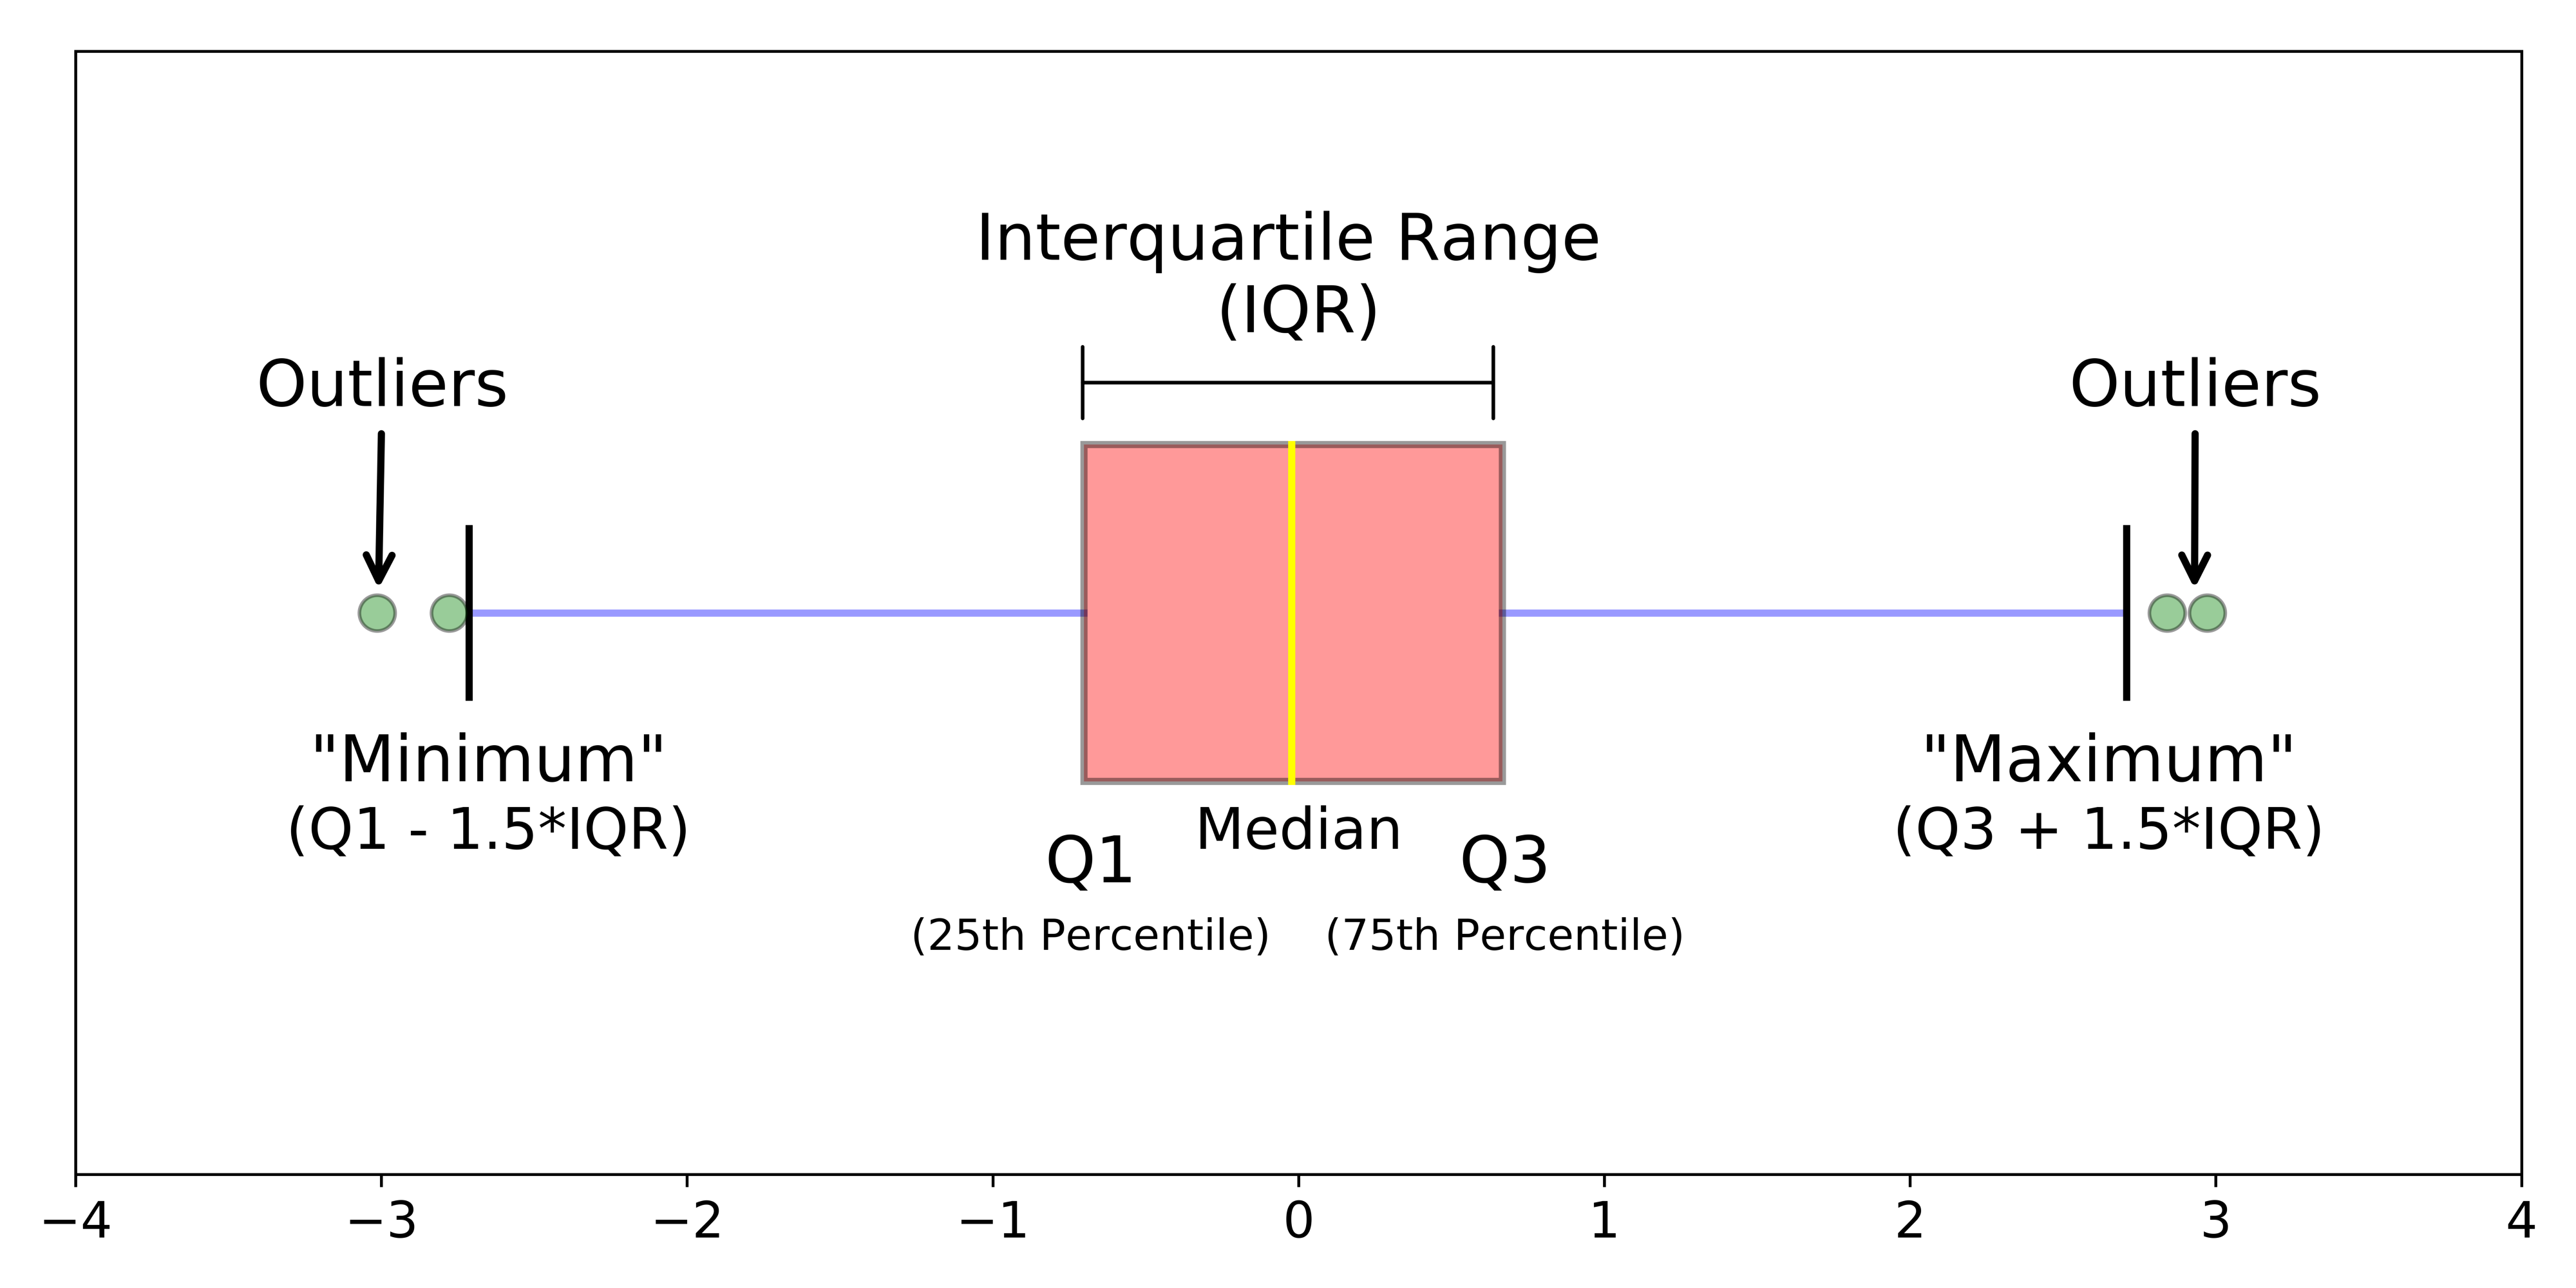

In [3]:
q1 = Data.quantile(0.25) # minimum
q3 = Data.quantile(0.75) # maximum
iqr = q3 - q1

outlier_criteria = (Data< (q1-1.5*iqr)) | (Data > (q3+1.5*iqr))
outlier_criteria.sum()

<ipython-input-3-de2739df3d4b>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_criteria = (Data< (q1-1.5*iqr)) | (Data > (q3+1.5*iqr))
<ipython-input-3-de2739df3d4b>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_criteria = (Data< (q1-1.5*iqr)) | (Data > (q3+1.5*iqr))


assists         27
games            0
goals           58
key_passes      24
npg             52
npxG            62
player_name      0
position         0
red_cards       47
shots           36
team_title       0
time             0
xA              35
xG              70
xGBuildup       13
xGChain         20
yellow_cards    13
dtype: int64

**2. Z-Score Method Detection**

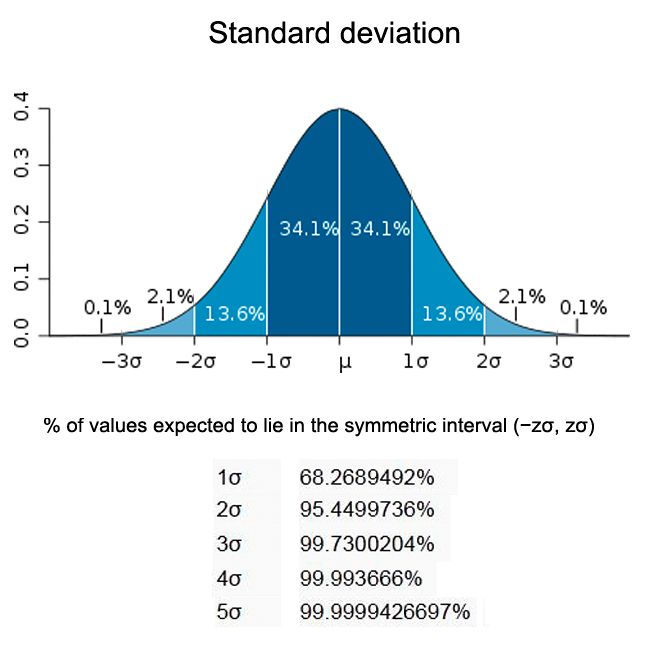

In [118]:
x = np.mean(Data)
std = np.std(Data)
outlier_z = np.abs((Data -x) / std) > 3
outlier_z.sum()

assists         12
games            0
goals           14
key_passes      10
npg             11
npxG            14
player_name      0
position         0
red_cards       47
shots            7
team_title       0
time             0
xA              12
xG              16
xGBuildup        8
xGChain          8
yellow_cards     5
dtype: int64

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

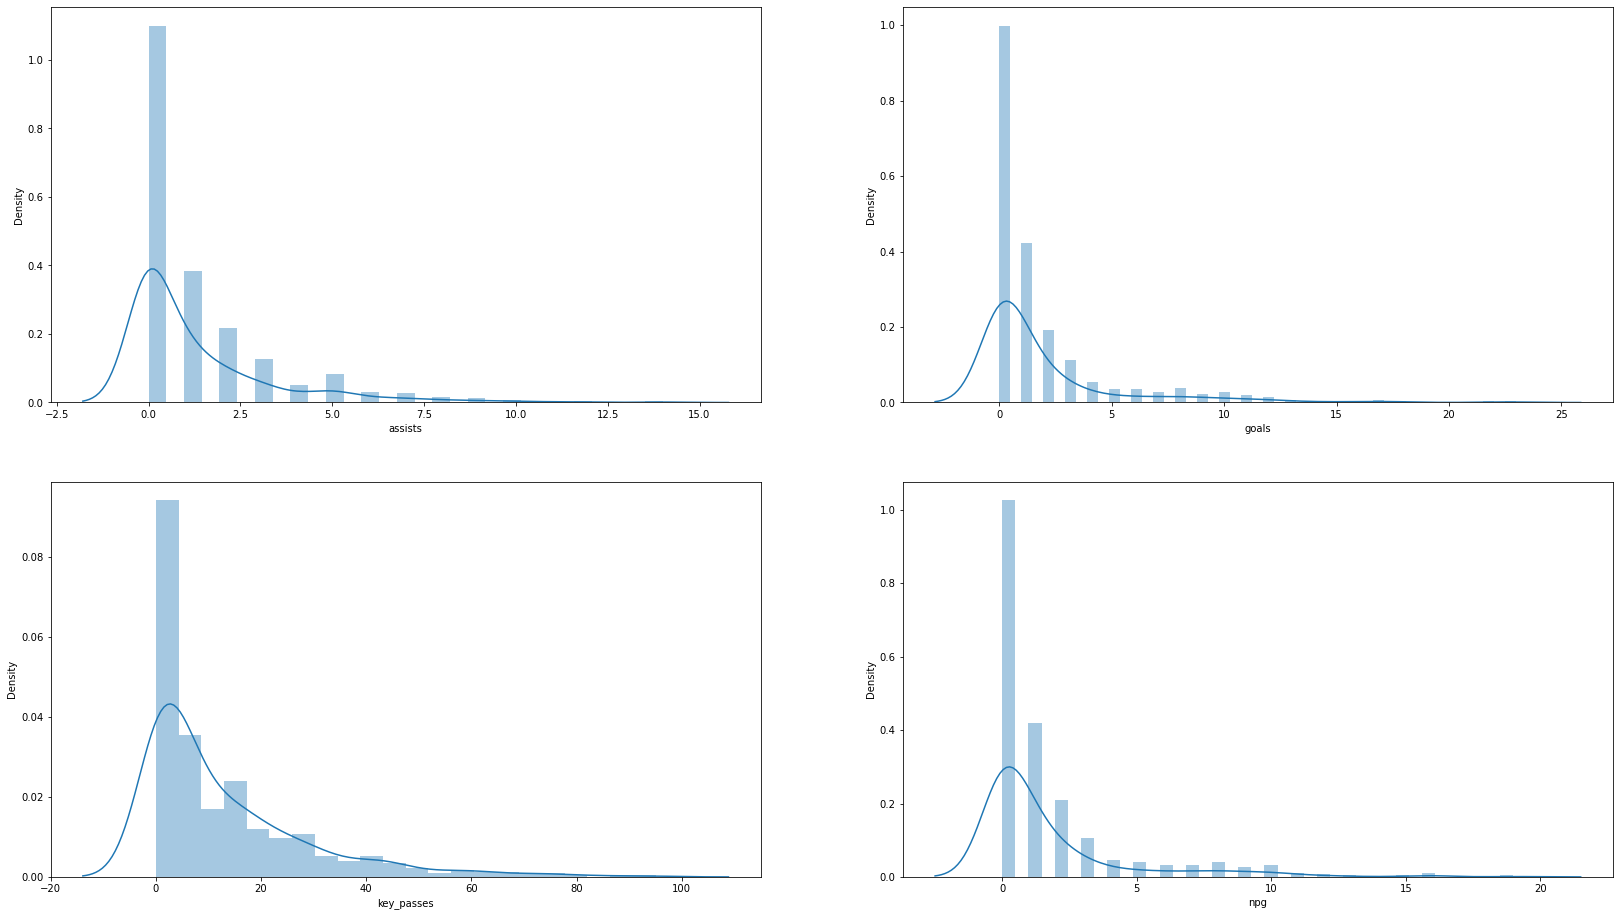

In [119]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.distplot(Data.assists )
plt.subplot(2,2,2)
sns.distplot(Data.goals)
plt.subplot(2,2,3)
sns.distplot(Data.key_passes)
plt.subplot(2,2,4)
sns.distplot(Data.npg)
plt.show()


**3.Boxplot**

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\si

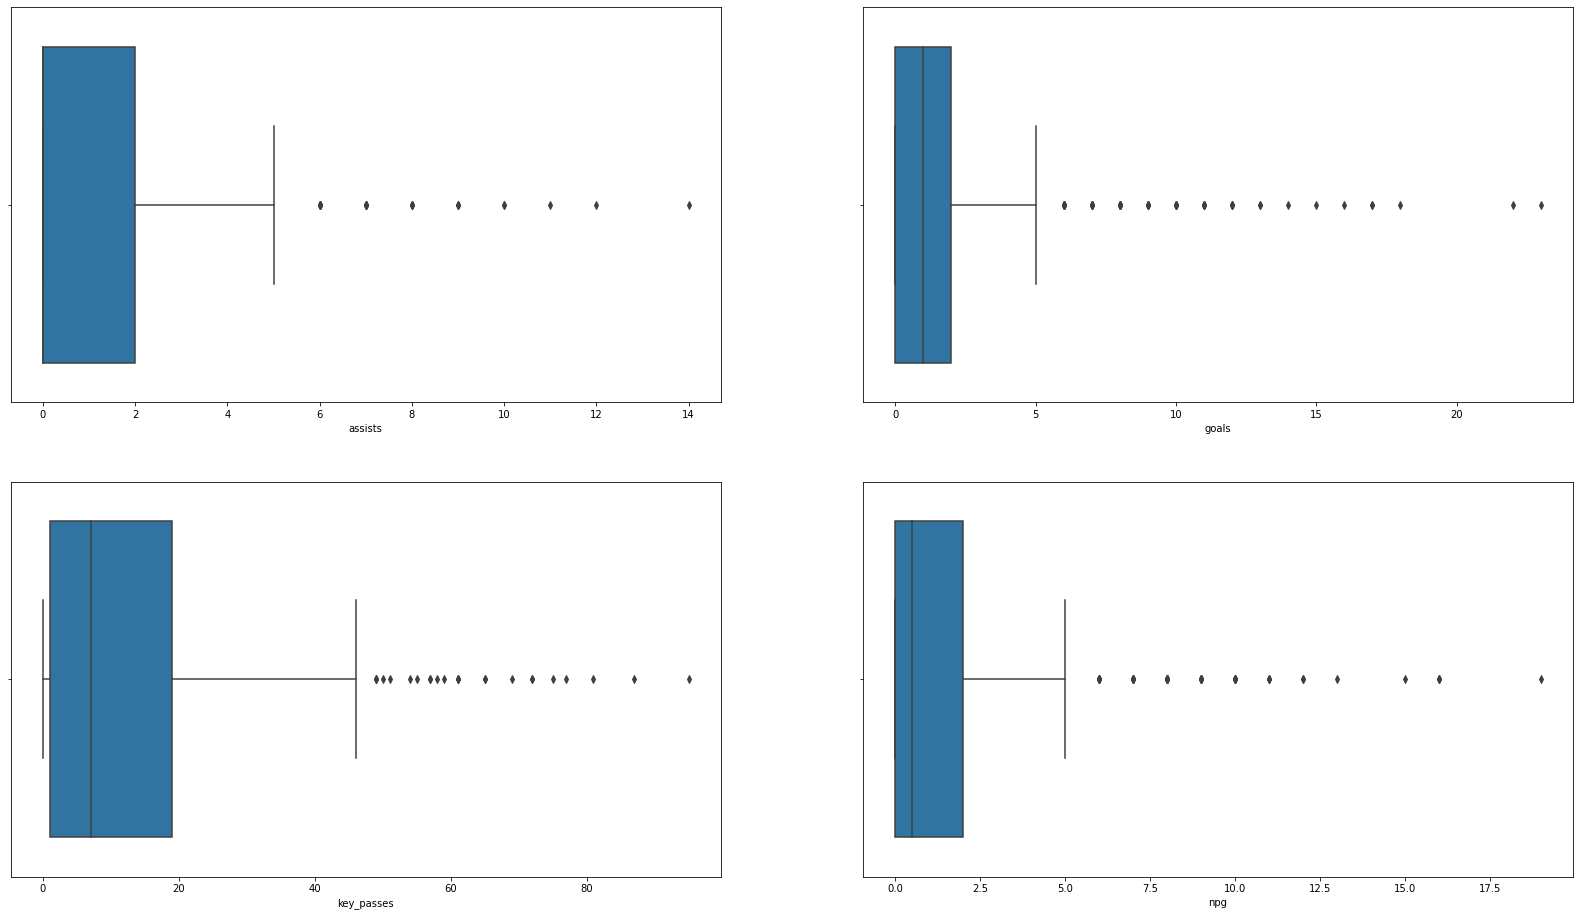

In [26]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.boxplot(Data.assists )
plt.subplot(2,2,2)
sns.boxplot(Data.goals)
plt.subplot(2,2,3)
sns.boxplot(Data.key_passes)
plt.subplot(2,2,4)
sns.boxplot(Data.npg)
plt.show()


**HANDLING USING SEPARATION**

In [4]:
Outlier = Data[outlier_criteria.any(axis=1)]
Non_Outlier = Data[~outlier_criteria.any(axis=1)]
Non_Outlier

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
59,Kurt Zouma,24,2024,5,3.136853,0,0.081467,27,4,3,0,D S,Chelsea,5,3.136853,6.216146,6.133133
60,Callum Robinson,28,1580,5,3.203063,0,1.049963,31,16,0,0,F M S,West Bromwich Albion,5,3.203063,5.216541,1.596336
63,Bobby Reid,33,2394,5,4.269852,2,1.309701,34,14,7,0,D F M S,Fulham,5,4.269852,8.202645,3.131384
72,Raúl Jiménez,10,824,4,2.360910,0,0.632963,26,6,0,0,F,Wolverhampton Wanderers,4,2.360910,3.684076,1.233211
73,Mateusz Klich,35,2404,4,2.999959,5,3.650850,36,44,6,0,M S,Leeds,2,1.477621,14.608117,10.386438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,Gaetano Berardi,2,113,0,0.074761,0,0.000000,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,Anthony Elanga,1,67,0,0.000000,0,0.000000,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,Femi Seriki,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\si

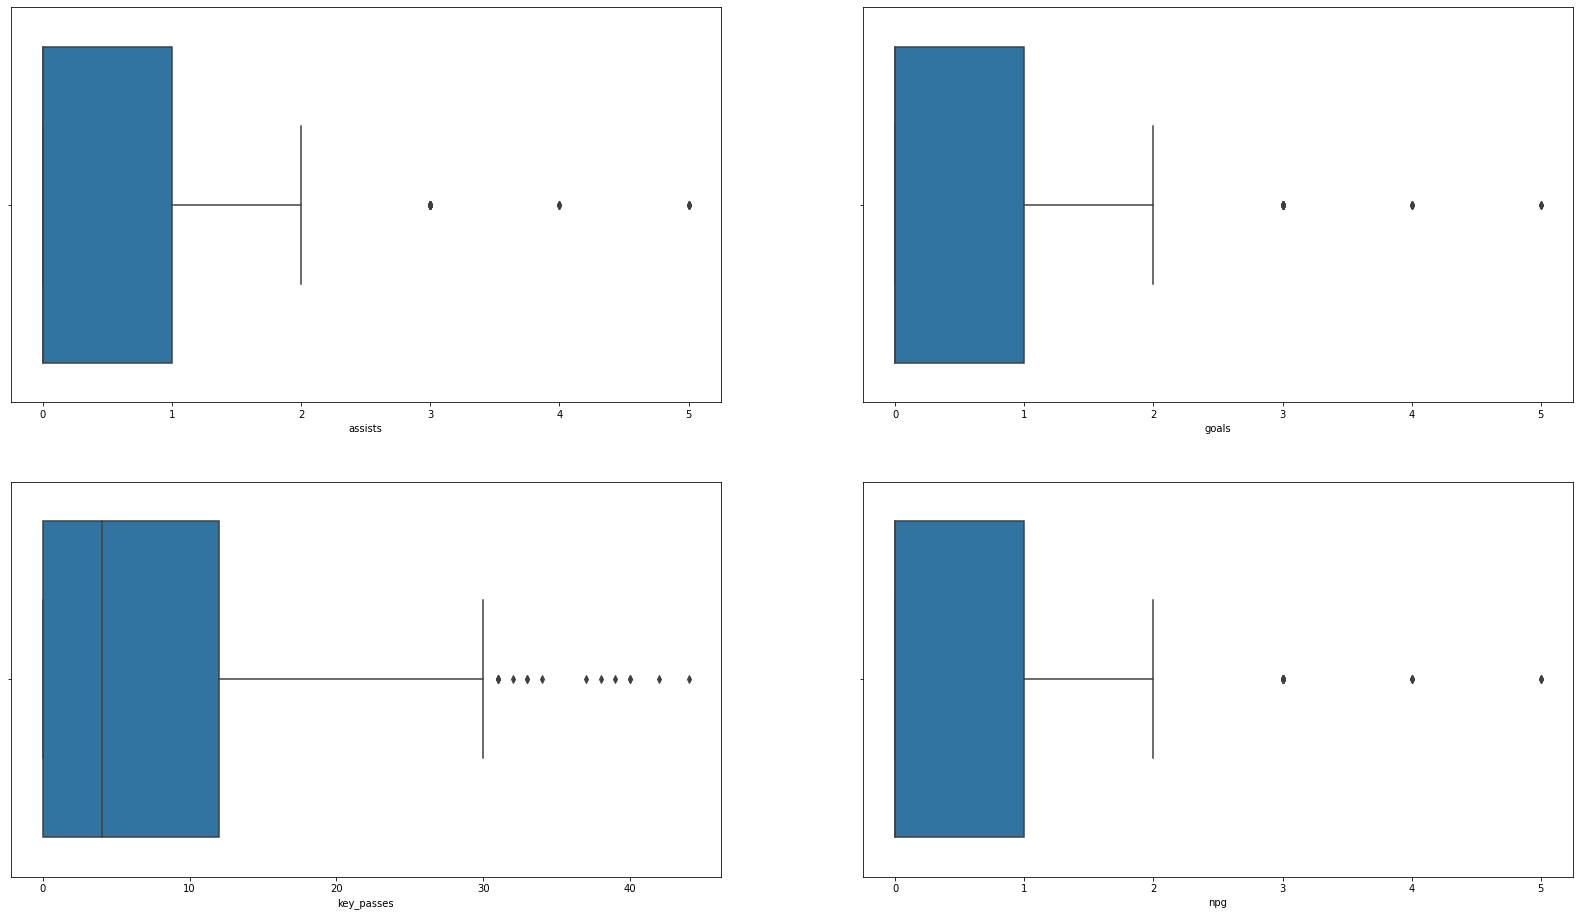

In [5]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.boxplot(Non_Outlier.assists )
plt.subplot(2,2,2)
sns.boxplot(Non_Outlier.goals)
plt.subplot(2,2,3)
sns.boxplot(Non_Outlier.key_passes)
plt.subplot(2,2,4)
sns.boxplot(Non_Outlier.npg)
plt.show()

**Evaluation**

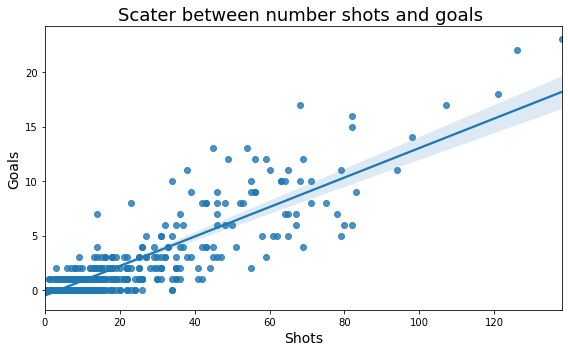

In [6]:
plt.figure(figsize = (8,5))

plt.title('Scater between number shots and goals ', size = 18)

sns.regplot(x = 'shots', y = 'goals', data = Data)

plt.xlabel('Shots', size = 14)
plt.ylabel('Goals', size = 14)

plt.tight_layout();

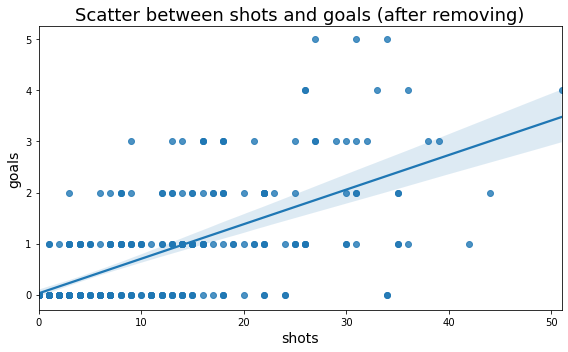

In [7]:
plt.figure(figsize = (8,5))

plt.title('Scatter between shots and goals (after removing)', size = 18)

sns.regplot(x = 'shots', y = 'goals', data = Non_Outlier)

plt.xlabel('shots', size = 14)
plt.ylabel('goals', size = 14)

plt.tight_layout();

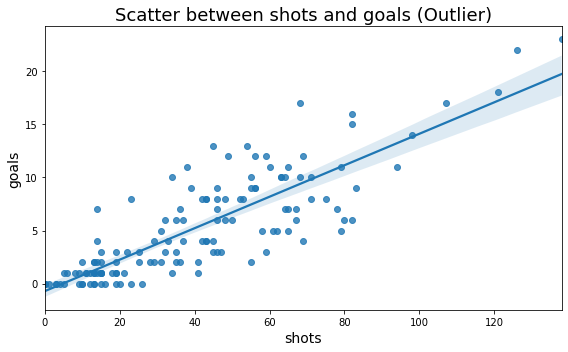

In [8]:
plt.figure(figsize = (8,5))

plt.title('Scatter between shots and goals (Outlier)', size = 18)

sns.regplot(x = 'shots', y = 'goals', data = Outlier)

plt.xlabel('shots', size = 14)
plt.ylabel('goals', size = 14)

plt.tight_layout();

**SQUARE TRANSFORMATION**

In [97]:
#from sklearn import preprocessing
Data_scal =Data.copy() 
Data_scal = Data_scal.drop(columns = ["player_name","team_title","position"])
Data_scal

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,35,3097,23,22.174859,14,7.577094,138,49,1,0,19,19.130183,24.995648,4.451257
1,37,3085,22,20.250847,5,6.528526,126,55,0,0,16,15.683834,28.968234,9.800236
2,37,3117,18,16.019454,12,11.474996,121,95,6,0,9,8.407840,26.911412,11.932285
3,37,3139,17,11.023287,10,9.512992,68,75,0,0,16,10.262118,20.671916,6.608751
4,38,3085,17,18.401863,7,3.782247,107,30,3,0,15,16.879525,23.394953,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1,1,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.056044,0.056044
518,2,113,0,0.074761,0,0.000000,1,0,0,0,0,0.074761,0.231278,0.231278
519,1,67,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000
520,1,1,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

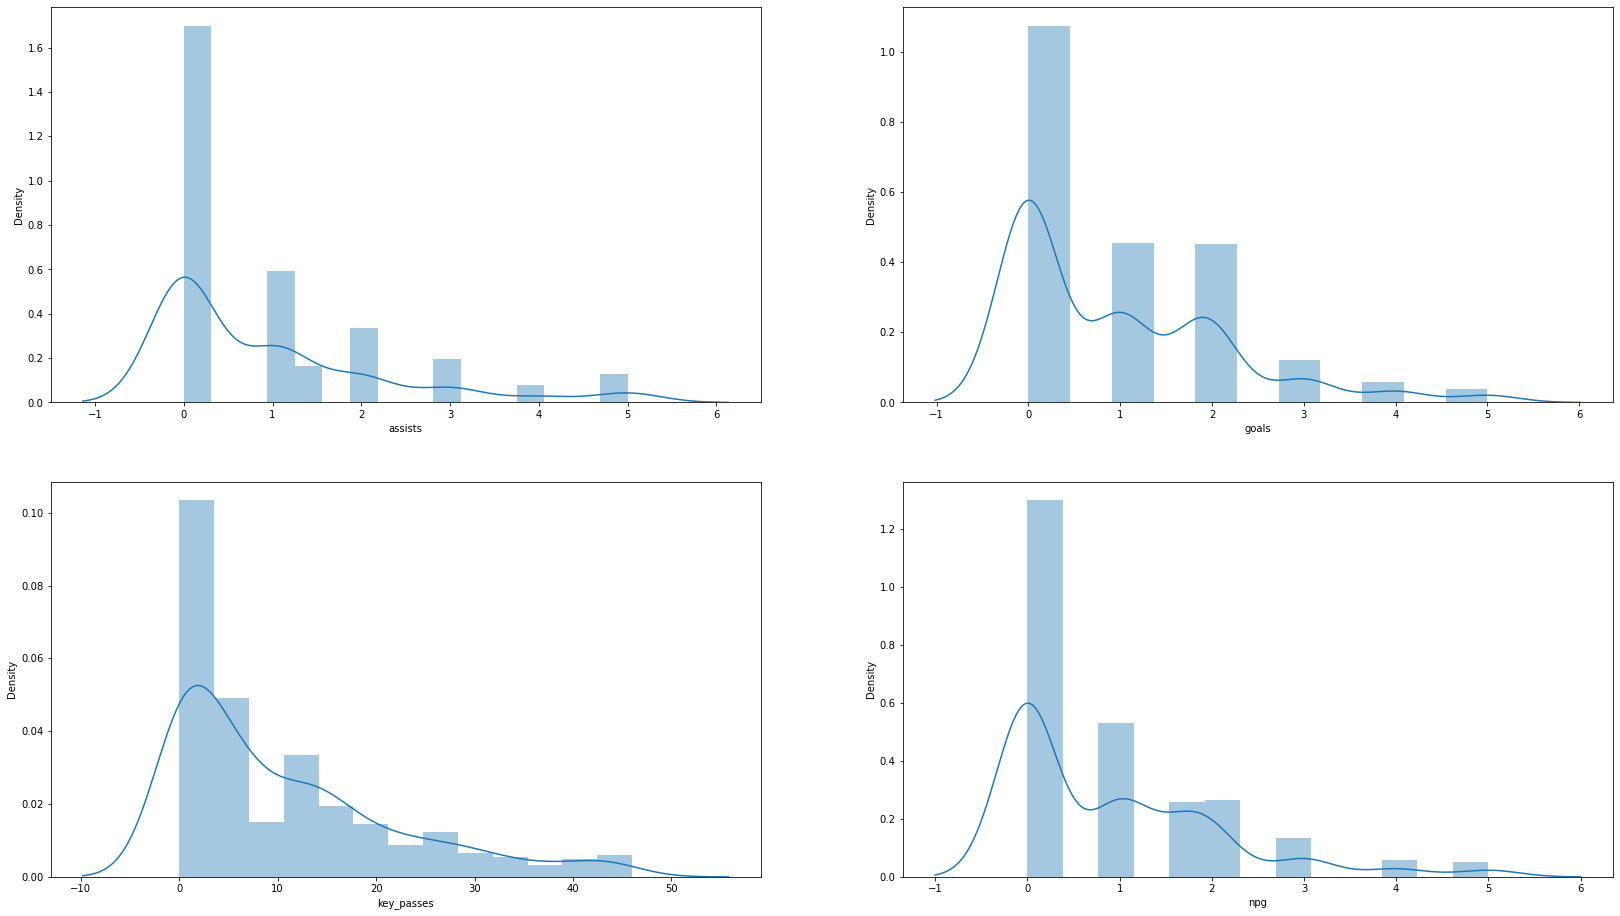

In [107]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.distplot(Data_scal.assists )
plt.subplot(2,2,2)
sns.distplot(Data_scal.goals)
plt.subplot(2,2,3)
sns.distplot(Data_scal.key_passes)
plt.subplot(2,2,4)
sns.distplot(Data_scal.npg)
plt.show()

In [113]:
Data_scal2 = np.sqrt(Data_scal)
Data_scal2

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,5.916080,55.650696,1.364576,1.414498,1.135461,1.173043,4.16885,3.600500,1.000000,0.0,1.291736,1.349611,2.379783,2.109800
1,6.082763,55.542776,1.364576,1.414498,2.236068,1.173043,4.16885,3.600500,0.000000,0.0,1.291736,1.349611,2.379783,3.130533
2,6.082763,55.830099,1.364576,1.414498,1.135461,1.173043,4.16885,3.600500,2.449490,0.0,1.291736,1.349611,2.379783,3.454314
3,6.082763,56.026779,1.364576,1.414498,1.135461,1.173043,4.16885,3.600500,0.000000,0.0,1.291736,1.349611,2.379783,2.570749
4,6.164414,55.542776,1.364576,1.414498,1.135461,1.944800,4.16885,5.477226,1.732051,0.0,1.291736,1.349611,2.379783,2.032682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.236736,0.236736
518,1.414214,10.630146,0.000000,0.273424,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.273424,0.480914,0.480914
519,1.000000,8.185353,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
520,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

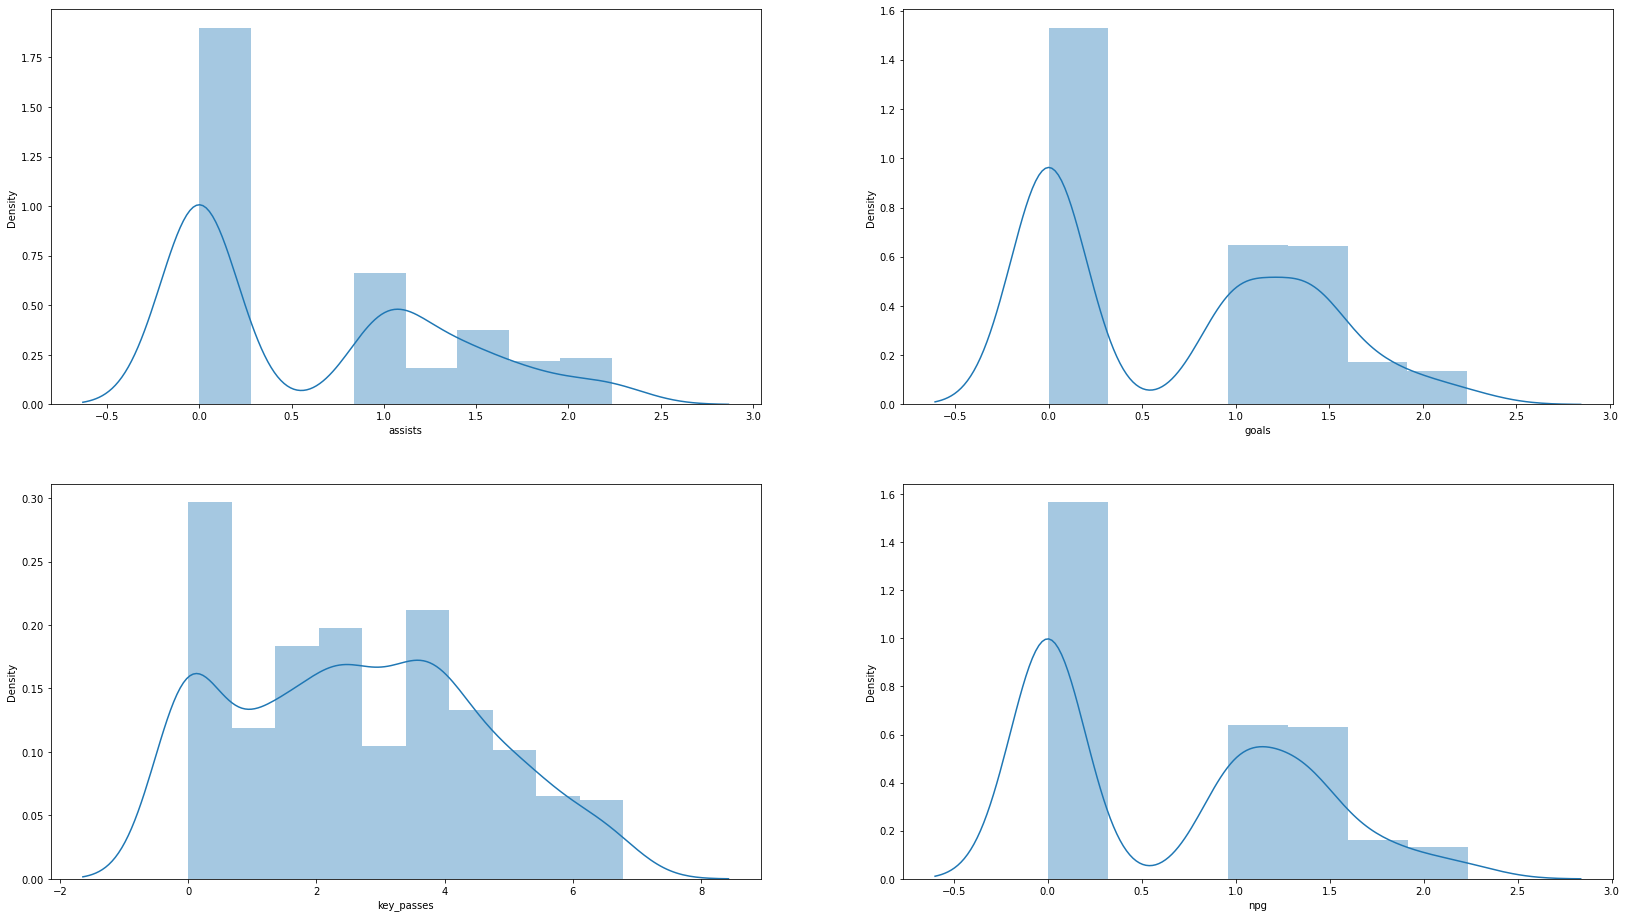

In [116]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.distplot(Data_scal2.assists )
plt.subplot(2,2,2)
sns.distplot(Data_scal2.goals)
plt.subplot(2,2,3)
sns.distplot(Data_scal2.key_passes)
plt.subplot(2,2,4)
sns.distplot(Data_scal2.npg)
plt.show()

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\si

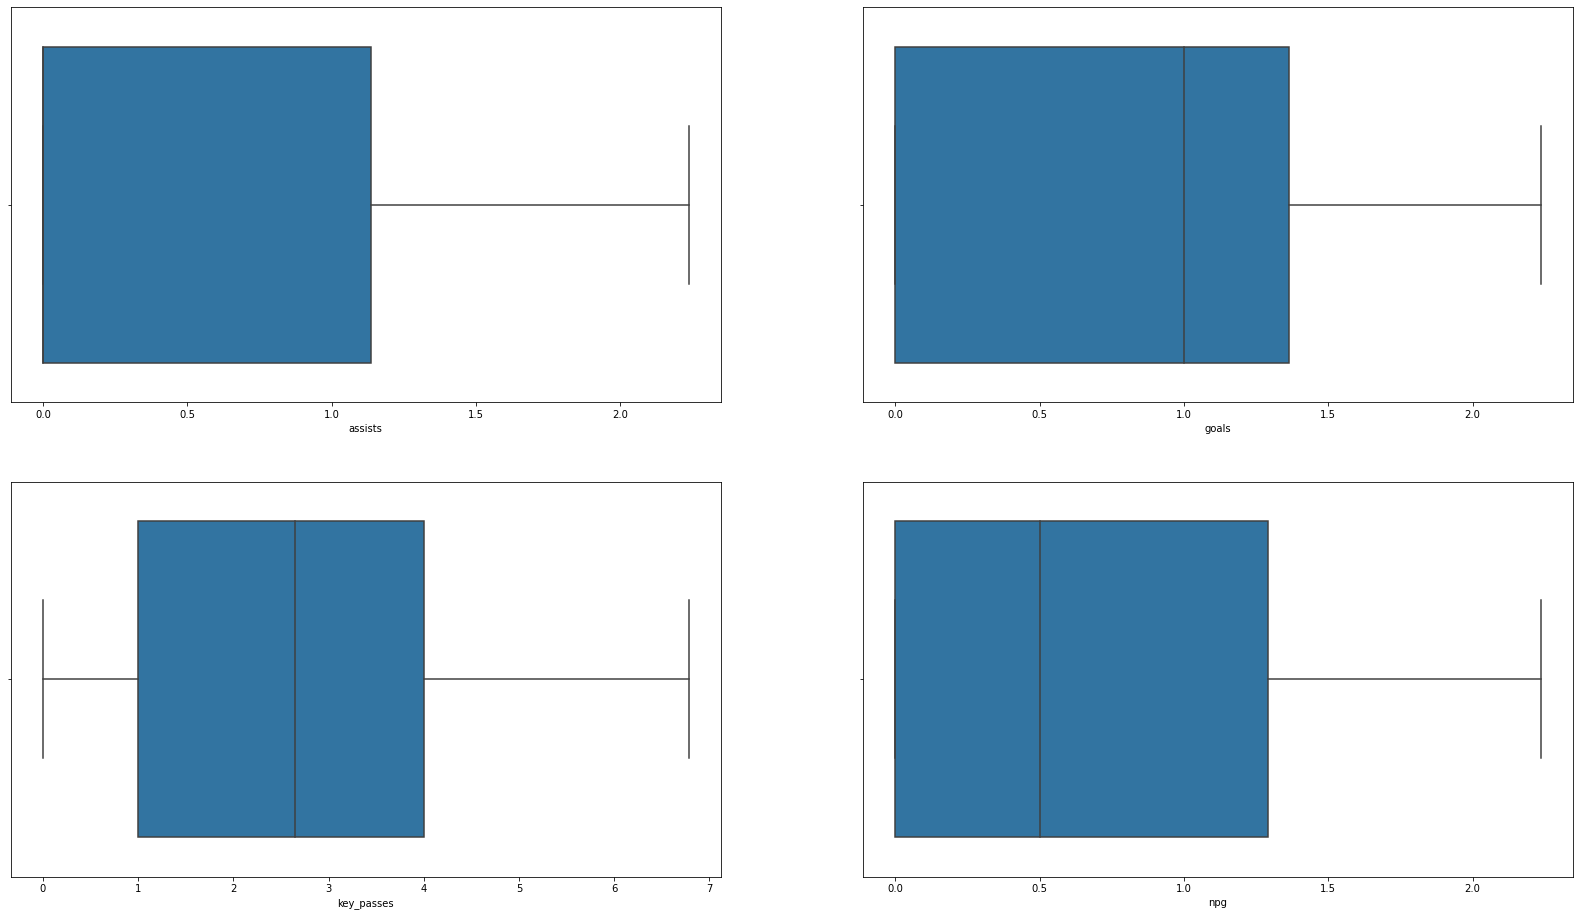

In [115]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.boxplot(Data_scal2.assists )
plt.subplot(2,2,2)
sns.boxplot(Data_scal2.goals)
plt.subplot(2,2,3)
sns.boxplot(Data_scal2.key_passes)
plt.subplot(2,2,4)
sns.boxplot(Data_scal2.npg)
plt.show()

**IMPUTATION or REPLACE VALUE**

In [99]:
q1 = Data_scal.quantile(0.25)
q3 = Data_scal.quantile(0.75)
x = np.mean(Data_scal)



In [101]:
Data_scal1 = pd.DataFrame(np.where((Data_scal < (q1-1.5*iqr)) | (Data_scal > (q3+1.5*iqr)),x,Data_scal),columns = Data_scal.columns)
Data_scal1

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,35.0,3097.0,1.862069,2.000806,1.289272,1.376029,17.37931,12.963602,1.0,0.0,1.668582,1.821450,5.663368,4.451257
1,37.0,3085.0,1.862069,2.000806,5.000000,1.376029,17.37931,12.963602,0.0,0.0,1.668582,1.821450,5.663368,9.800236
2,37.0,3117.0,1.862069,2.000806,1.289272,1.376029,17.37931,12.963602,6.0,0.0,1.668582,1.821450,5.663368,11.932285
3,37.0,3139.0,1.862069,2.000806,1.289272,1.376029,17.37931,12.963602,0.0,0.0,1.668582,1.821450,5.663368,6.608751
4,38.0,3085.0,1.862069,2.000806,1.289272,3.782247,17.37931,30.000000,3.0,0.0,1.668582,1.821450,5.663368,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.056044,0.056044
518,2.0,113.0,0.000000,0.074761,0.000000,0.000000,1.00000,0.000000,0.0,0.0,0.000000,0.074761,0.231278,0.231278
519,1.0,67.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
520,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\si

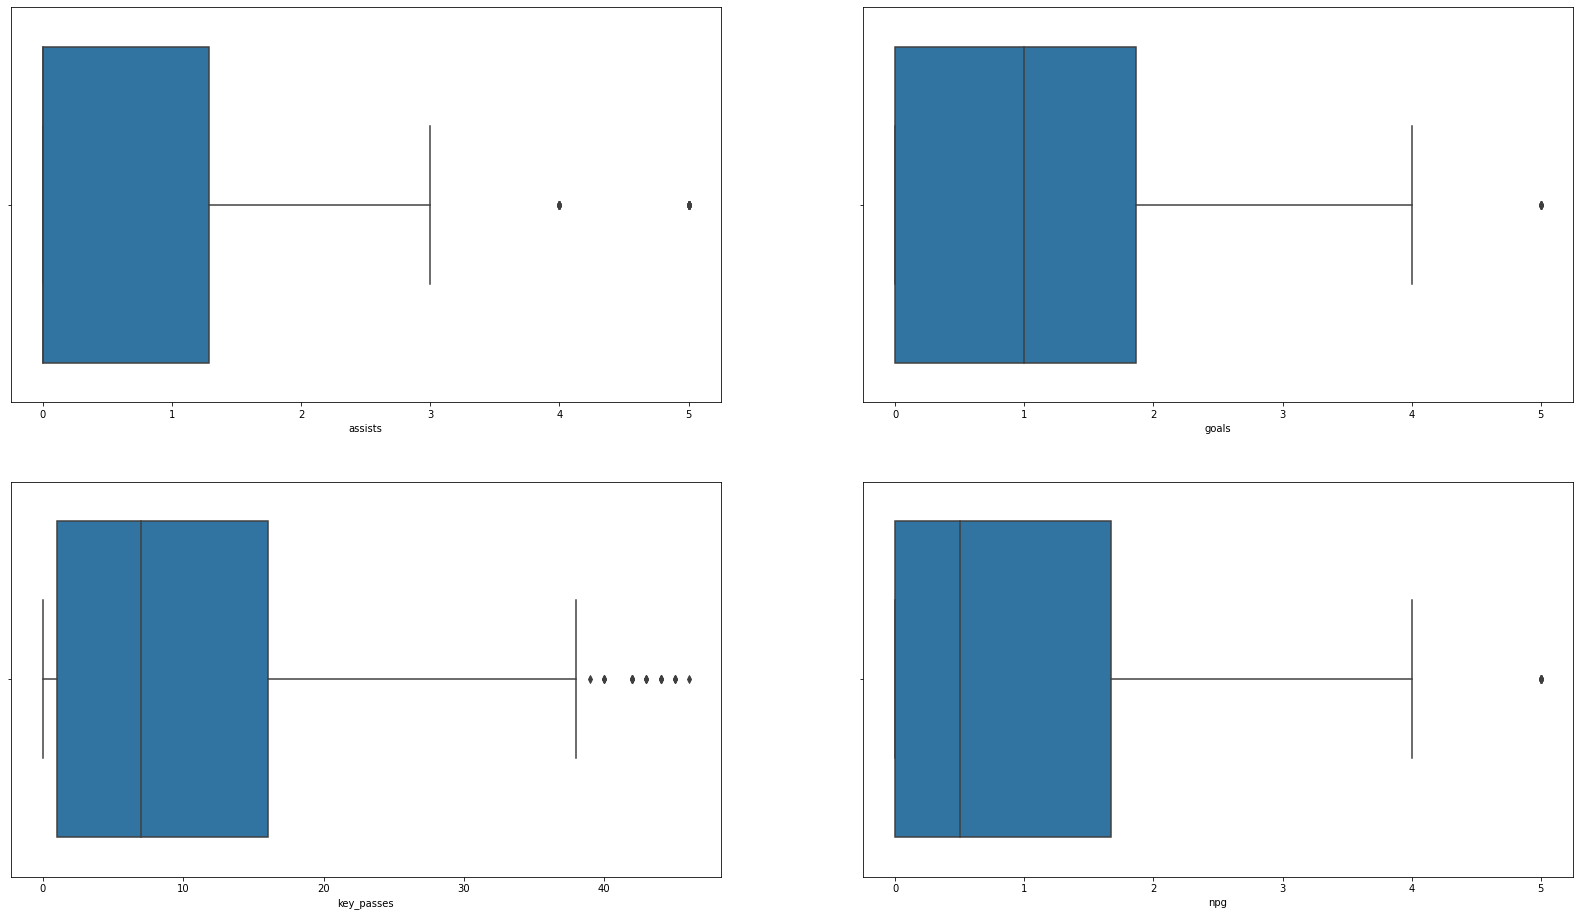

In [102]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.boxplot(Data_scal1.assists )
plt.subplot(2,2,2)
sns.boxplot(Data_scal1.goals)
plt.subplot(2,2,3)
sns.boxplot(Data_scal1.key_passes)
plt.subplot(2,2,4)
sns.boxplot(Data_scal1.npg)
plt.show()

# 3. Data Scaling

In [10]:
Data = pd.read_csv("CC GENERAL.csv")
Data = Data.drop(columns = ["CUST_ID"])

Data['MINIMUM_PAYMENTS'] =Data['MINIMUM_PAYMENTS'].fillna(Data['MINIMUM_PAYMENTS'].median())
Data['CREDIT_LIMIT'] =Data['CREDIT_LIMIT'].fillna(Data['CREDIT_LIMIT'].median())

Data1 = Data.copy()
Data2 = Data.copy()
Data3 = Data.copy()
Data1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

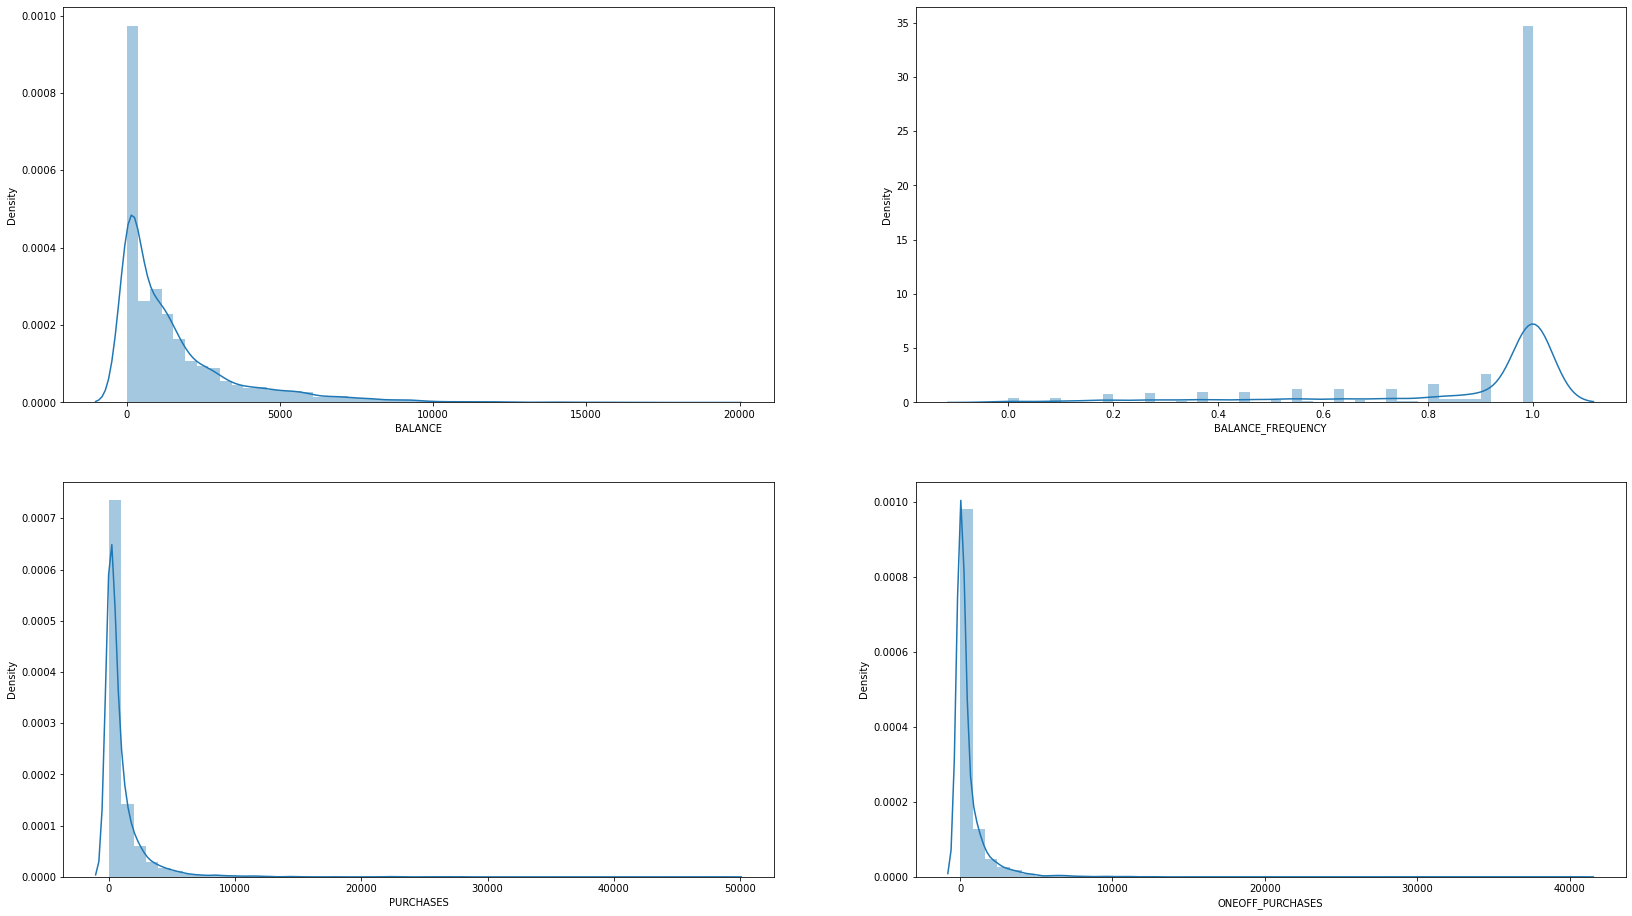

In [155]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.distplot(Data1.BALANCE )
plt.subplot(2,2,2)
sns.distplot(Data1.BALANCE_FREQUENCY)
plt.subplot(2,2,3)
sns.distplot(Data1.PURCHASES)
plt.subplot(2,2,4)
sns.distplot(Data1.ONEOFF_PURCHASES)
plt.show()

**MAXIMUM SCALING**

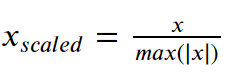

In [156]:
def max_scal (df) :
    df_scal = df.copy()
    for column in df_scal.columns : 
        df_scal[column] = df_scal[column] / df_scal[column].abs().max()
    return df_scal

Max_scaled = max_scal(Data) 
Max_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.006419,0.000640,0.500000,0.5
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.005439,0.004088,0.000000,0.5
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.033333,0.001602,0.001079,0.250000,0.5
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.016667,0.001036,0.000730,0.250000,0.5


C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

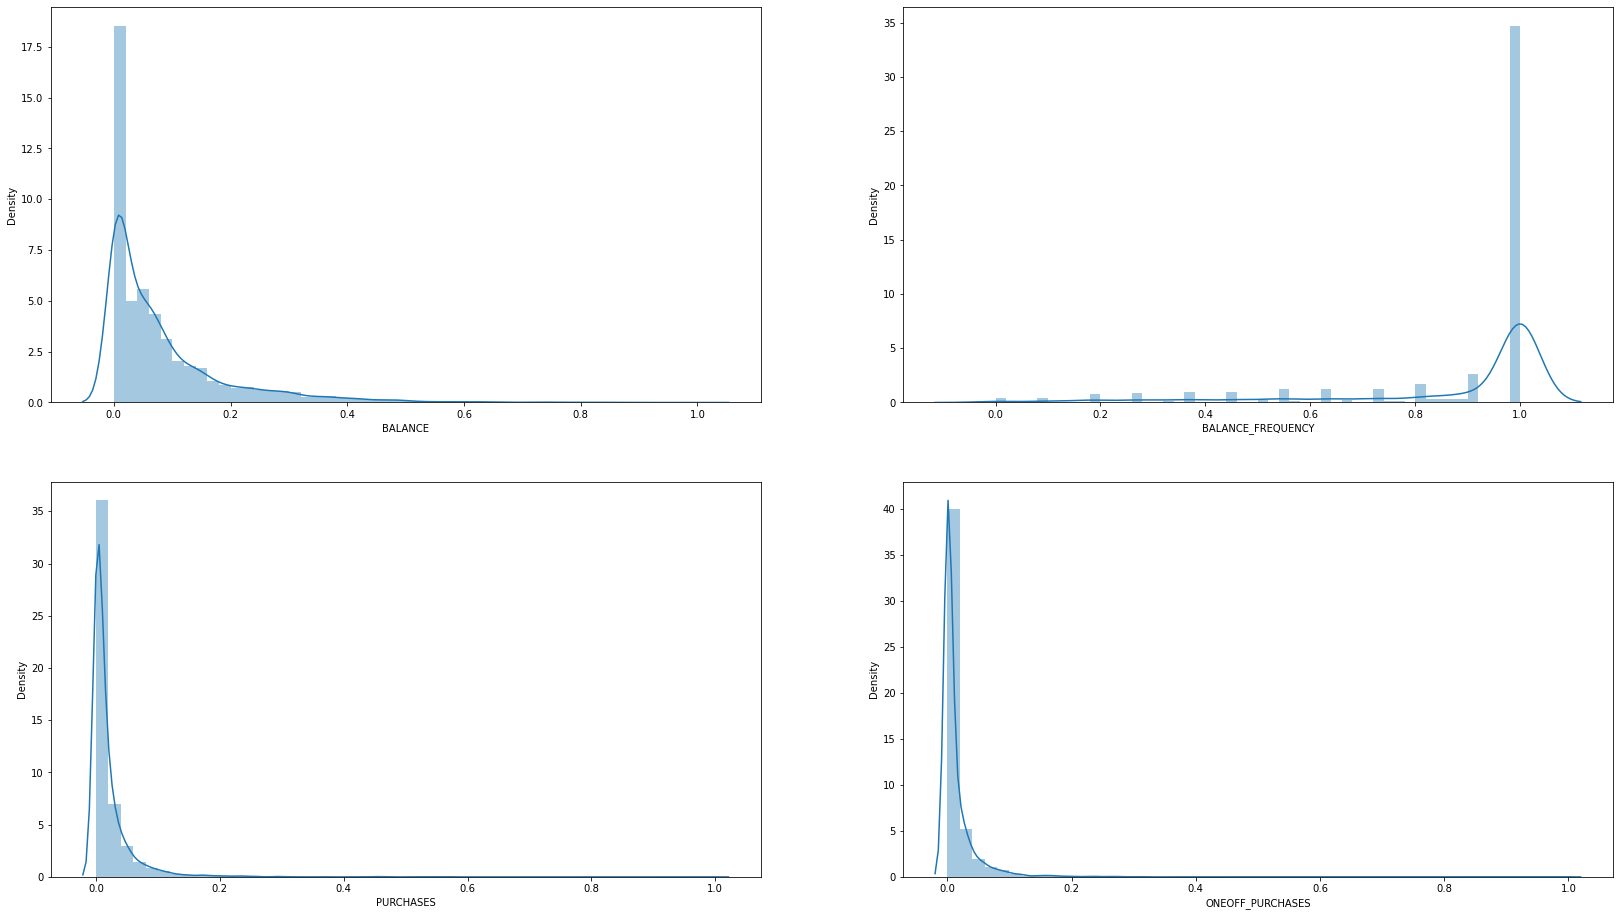

In [157]:
plt.figure(figsize=(28,16))
plt.subplot(2,2,1)
sns.distplot(Max_scaled.BALANCE )
plt.subplot(2,2,2)
sns.distplot(Max_scaled.BALANCE_FREQUENCY)
plt.subplot(2,2,3)
sns.distplot(Max_scaled.PURCHASES)
plt.subplot(2,2,4)
sns.distplot(Max_scaled.ONEOFF_PURCHASES)
plt.show()

**MIN-MAX SCALING/NORMALIZATION**

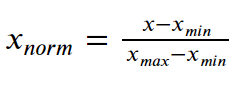

In [158]:
def min_max (df):
    df_norm = df.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm   

minmax = min_max(Data2)
minmax

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.004088,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


**Z-SCORE or STANDARDIZATION**

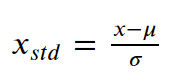

In [11]:
def z_score (df):
    df_z = df.copy()
    for column in df_z.columns :
        df_z[column] = (df_z[column]-df_z[column].mean())/df_z[column].std()
    return df_z

z_scal = z_score(Data3)
z_scal

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960325,-0.528949,-0.302383,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688640,0.818596,0.097494,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826054,-0.383783,-0.093288,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826054,-0.598655,-0.228294,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905359,-0.364347,-0.257252,-0.525522,0.360659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960325,-0.486189,-0.341231,1.183885,-4.122537
8946,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960325,-0.503368,-0.228294,-0.525522,-4.122537
8947,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,-0.476043,-0.390617,-0.960325,-0.570583,-0.326857,0.329182,-4.122537
8948,-0.745133,-0.185466,-0.469526,-0.356914,-0.454551,-0.449327,-1.221690,-0.678623,-0.916944,0.157518,-0.182988,-0.591763,-1.097738,-0.580503,-0.338286,0.329182,-4.122537


**TRANSFORMATION**

In [12]:
SQRT = np.sqrt(Data1)
LOG = np.log(Data2)
REPRI = np.reciprocal(Data3)

In [13]:
SQRT

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.000000,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.000000,1.000000,86.602540,0.000000,17.673255,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.337932,1.000000,17.062239,0.000000,17.062239,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,18.044236,6.991879,0.707107,2.449490
8946,4.379865,1.000000,17.320508,0.000000,17.320508,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,16.609073,17.673255,0.000000,2.449490
8947,4.837217,0.912871,12.016655,0.000000,12.016655,0.000000,0.912871,0.000000,0.816497,0.000000,0.000000,2.236068,31.622777,9.015031,9.078456,0.500000,2.449490
8948,3.668455,0.912871,0.000000,0.000000,0.000000,6.046386,0.000000,0.000000,0.000000,0.408249,1.414214,0.000000,22.360680,7.249135,7.466969,0.500000,2.449490


In [14]:
LOG

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.711148,-0.200670,4.558079,-inf,4.558079,-inf,-1.791757,-inf,-2.484911,-inf,-inf,0.693147,6.907755,5.307287,4.938135,-inf,2.484907
1,8.071677,-0.095310,-inf,-inf,-inf,8.770741,-inf,-inf,-inf,-1.386294,1.386294,-inf,8.853665,8.319482,6.977599,-1.504078,2.484907
2,7.822104,0.000000,6.650499,6.650499,-inf,-inf,0.000000,0.000000,-inf,-inf,-inf,2.484907,8.922658,6.433047,6.441401,-inf,2.484907
3,7.418583,-0.451985,7.312553,7.312553,-inf,5.326847,-2.484911,-2.484911,-inf,-2.484911,0.000000,0.000000,8.922658,-inf,5.744105,-inf,2.484907
4,6.706513,0.000000,2.772589,2.772589,-inf,-inf,-2.484911,-2.484911,-inf,-inf,-inf,0.000000,7.090077,6.519641,5.500406,-inf,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.349677,0.000000,5.673736,-inf,5.673736,-inf,0.000000,-inf,-0.182322,-inf,-inf,1.791759,6.907755,5.785653,3.889499,-0.693147,1.791759
8946,2.954036,0.000000,5.703782,-inf,5.703782,-inf,0.000000,-inf,-0.182322,-inf,-inf,1.791759,6.907755,5.619898,5.744105,-inf,1.791759
8947,3.152679,-0.182322,4.972587,-inf,4.972587,-inf,-0.182322,-inf,-0.405465,-inf,-inf,1.609438,6.907755,4.397786,4.411808,-1.386294,1.791759
8948,2.599541,-0.182322,-inf,-inf,-inf,3.598921,-inf,-inf,-inf,-1.791757,0.693147,-inf,6.214608,3.961764,4.020978,-1.386294,1.791759


In [15]:
REPRI

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.024449,1.222222,0.010482,inf,0.010482,inf,5.999988,inf,12.000048,inf,-9223372036854775808,0,0.001000,0.004955,0.007168,inf,0
1,0.000312,1.100000,inf,inf,inf,0.000155,inf,inf,inf,4.000000,0,-9223372036854775808,0.000143,0.000244,0.000933,4.500005,0
2,0.000401,1.000000,0.001293,0.001293,inf,inf,1.000000,1.000000,inf,inf,-9223372036854775808,0,0.000133,0.001608,0.001594,inf,0
3,0.000600,1.571428,0.000667,0.000667,inf,0.004859,12.000048,12.000048,inf,12.000048,1,1,0.000133,inf,0.003202,inf,0
4,0.001223,1.000000,0.062500,0.062500,inf,inf,12.000048,12.000048,inf,inf,-9223372036854775808,1,0.000833,0.001474,0.004085,inf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.035096,1.000000,0.003435,inf,0.003435,inf,1.000000,inf,1.200000,inf,-9223372036854775808,0,0.001000,0.003071,0.020456,2.000000,0
8946,0.052129,1.000000,0.003333,inf,0.003333,inf,1.000000,inf,1.200000,inf,-9223372036854775808,0,0.001000,0.003625,0.003202,inf,0
8947,0.042737,1.200000,0.006925,inf,0.006925,inf,1.200000,inf,1.499999,inf,-9223372036854775808,0,0.001000,0.012305,0.012133,4.000000,0
8948,0.074308,1.200000,inf,inf,inf,0.027353,inf,inf,inf,5.999988,0,-9223372036854775808,0.002000,0.019030,0.017935,4.000000,0


# 4. One Hot Encoding

In [180]:
Data = pd.read_csv ('automobileEDA.csv',index_col = 0)
Df = pd.DataFrame (Data['body-style'])

encoded_columns = pd.get_dummies(Df['body-style'])
data = Df.join(encoded_columns)
data
#Data = Data['']

,body-style,convertible,hardtop,hatchback,sedan,wagon
symboling,,,,,,
-2,sedan,0,0,0,1,0
-2,sedan,0,0,0,1,0
-2,sedan,0,0,0,1,0
-2,sedan,0,0,0,1,0
-2,sedan,0,0,0,1,0
...,...,...,...,...,...,...
3,hatchback,0,0,1,0,0
3,hatchback,0,0,1,0,0
3,hatchback,0,0,1,0,0


# 5. Grouping

In [3]:
Data = pd.read_csv ('automobileEDA.csv',index_col = 0)
Data1 =Data[['normalized-losses','drive-wheels','engine-location']]
Data1

,normalized-losses,drive-wheels,engine-location
symboling,,,
3,122,rwd,front
3,122,rwd,front
1,122,rwd,front
2,164,fwd,front
2,164,4wd,front
...,...,...,...
-1,95,rwd,front
-1,95,rwd,front
-1,95,rwd,front


In [4]:
Data1.groupby('normalized-losses').agg(lambda x: x.value_counts().index[0])

,drive-wheels,engine-location
normalized-losses,,
65,fwd,front
74,rwd,front
77,fwd,front
78,fwd,front
81,4wd,front
83,fwd,front
85,fwd,front
87,fwd,front
89,fwd,front


In [5]:
Data1.pivot_table(index='drive-wheels', columns='engine-location', values='normalized-losses', aggfunc=np.mean, fill_value = 0)

engine-location,front,rear
drive-wheels,,
4wd,99.125000,0
fwd,115.627119,0
rwd,134.986111,122
